In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
pwd

'C:\\Users\\window 10\\Documents\\SKJ ML & AI\\UpGrad\\Course 3 - Machine Learning - 1\\Module 1 - Linear Regression\\Session 5 - Industry Relevance of Linear Regression'

In [8]:
import os
os.listdir()

['.ipynb_checkpoints',
 'DataDictionary_mediacompany.csv',
 'Media+Company.ipynb',
 'mediacompany.csv',
 'Predict decline in view for a media company Linear regression case study.ipynb',
 'Predict decline in view for a media company using LR.ipynb']

In [10]:
for file in os.listdir():
    if file.endswith('.csv'):
        print(file)

DataDictionary_mediacompany.csv
mediacompany.csv


In [277]:
media = pd.read_csv('./mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [278]:
dd_media = pd.read_csv('./DataDictionary_mediacompany.csv')
dd_media

,Variable,Explaination
0,Views_show,Number of times the show was viewed
1,Visitors,"Number of visitors who browsed the platform, b..."
2,Views_platform,Number of times a video was viewed on the plat...
3,Ad_impression,Proxy for marketing budget. Represents number ...
4,Cricket_match_india,If a cricket match was being played. 1 indicat...
5,Character_A,Describes presence of Character A. 1 indicates...


In [279]:
from pandas import option_context
with option_context('display.max_colwidth', 250):
    display(dd_media)

,Variable,Explaination
0,Views_show,Number of times the show was viewed
1,Visitors,"Number of visitors who browsed the platform, but not necessarily watched a video."
2,Views_platform,Number of times a video was viewed on the platform
3,Ad_impression,Proxy for marketing budget. Represents number of impressions generated by ads
4,Cricket_match_india,"If a cricket match was being played. 1 indicates that there was a match on a given day, 0 indicates there wasn't"
5,Character_A,"Describes presence of Character A. 1 indicates that character A was present in the episode, 0 indicates she/he wasn't"


In [280]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [281]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [282]:
media.shape

(80, 8)

In [283]:
# excludeing last column
media = media.iloc[:, 0:7]
media.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [284]:
media.shape

(80, 7)

In [285]:
# convert date string into date time format
media['Date'] = pd.to_datetime(media['Date'], format='%m/%d/%Y' )
media['Date']

0    2017-03-01
1    2017-03-02
2    2017-03-03
3    2017-03-04
4    2017-03-05
        ...    
75   2017-05-15
76   2017-05-16
77   2017-05-17
78   2017-05-18
79   2017-05-19
Name: Date, Length: 80, dtype: datetime64[ns]

In [286]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [287]:
media['Month'] = media['Date'].dt.month
media['Month'] 

0     3
1     3
2     3
3     3
4     3
     ..
75    5
76    5
77    5
78    5
79    5
Name: Month, Length: 80, dtype: int64

In [288]:
media['Year'] = media['Date'].dt.year
media['Year']

0     2017
1     2017
2     2017
3     2017
4     2017
      ... 
75    2017
76    2017
77    2017
78    2017
79    2017
Name: Year, Length: 80, dtype: int64

In [289]:
media['Month'].value_counts().reset_index()

,index,Month
0,3,31
1,4,30
2,5,19


In [290]:
media.head

<bound method NDFrame.head of          Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  2017-03-01      183738   1260228         1706478     1060860448   
1  2017-03-02      193763   1270561         1690727     1031846645   
2  2017-03-03      210479   1248183         1726157     1010867575   
3  2017-03-04      240061   1492913         1855353     1079194579   
4  2017-03-05      446314   1594712         2041418     1357736987   
..        ...         ...       ...             ...            ...   
75 2017-05-15      313945   1808684         2226788     1398052759   
76 2017-05-16      185689   1814227         2199844     1311961223   
77 2017-05-17      142260   1755803         2225752     1248266254   
78 2017-05-18      135871   1749654         2302789     1284859759   
79 2017-05-19      108961   1746735         2279036     1246026846   

    Cricket_match_india  Character_A  Month  Year  
0                     0            0      3  2017  
1                     0  

In [291]:
media['Character_A'].value_counts().reset_index()

,index,Character_A
0,0,50
1,1,30


In [292]:
media['Cricket_match_india'].value_counts().reset_index()

,index,Cricket_match_india
0,0,72
1,1,8


<Figure size 1500x700 with 0 Axes>

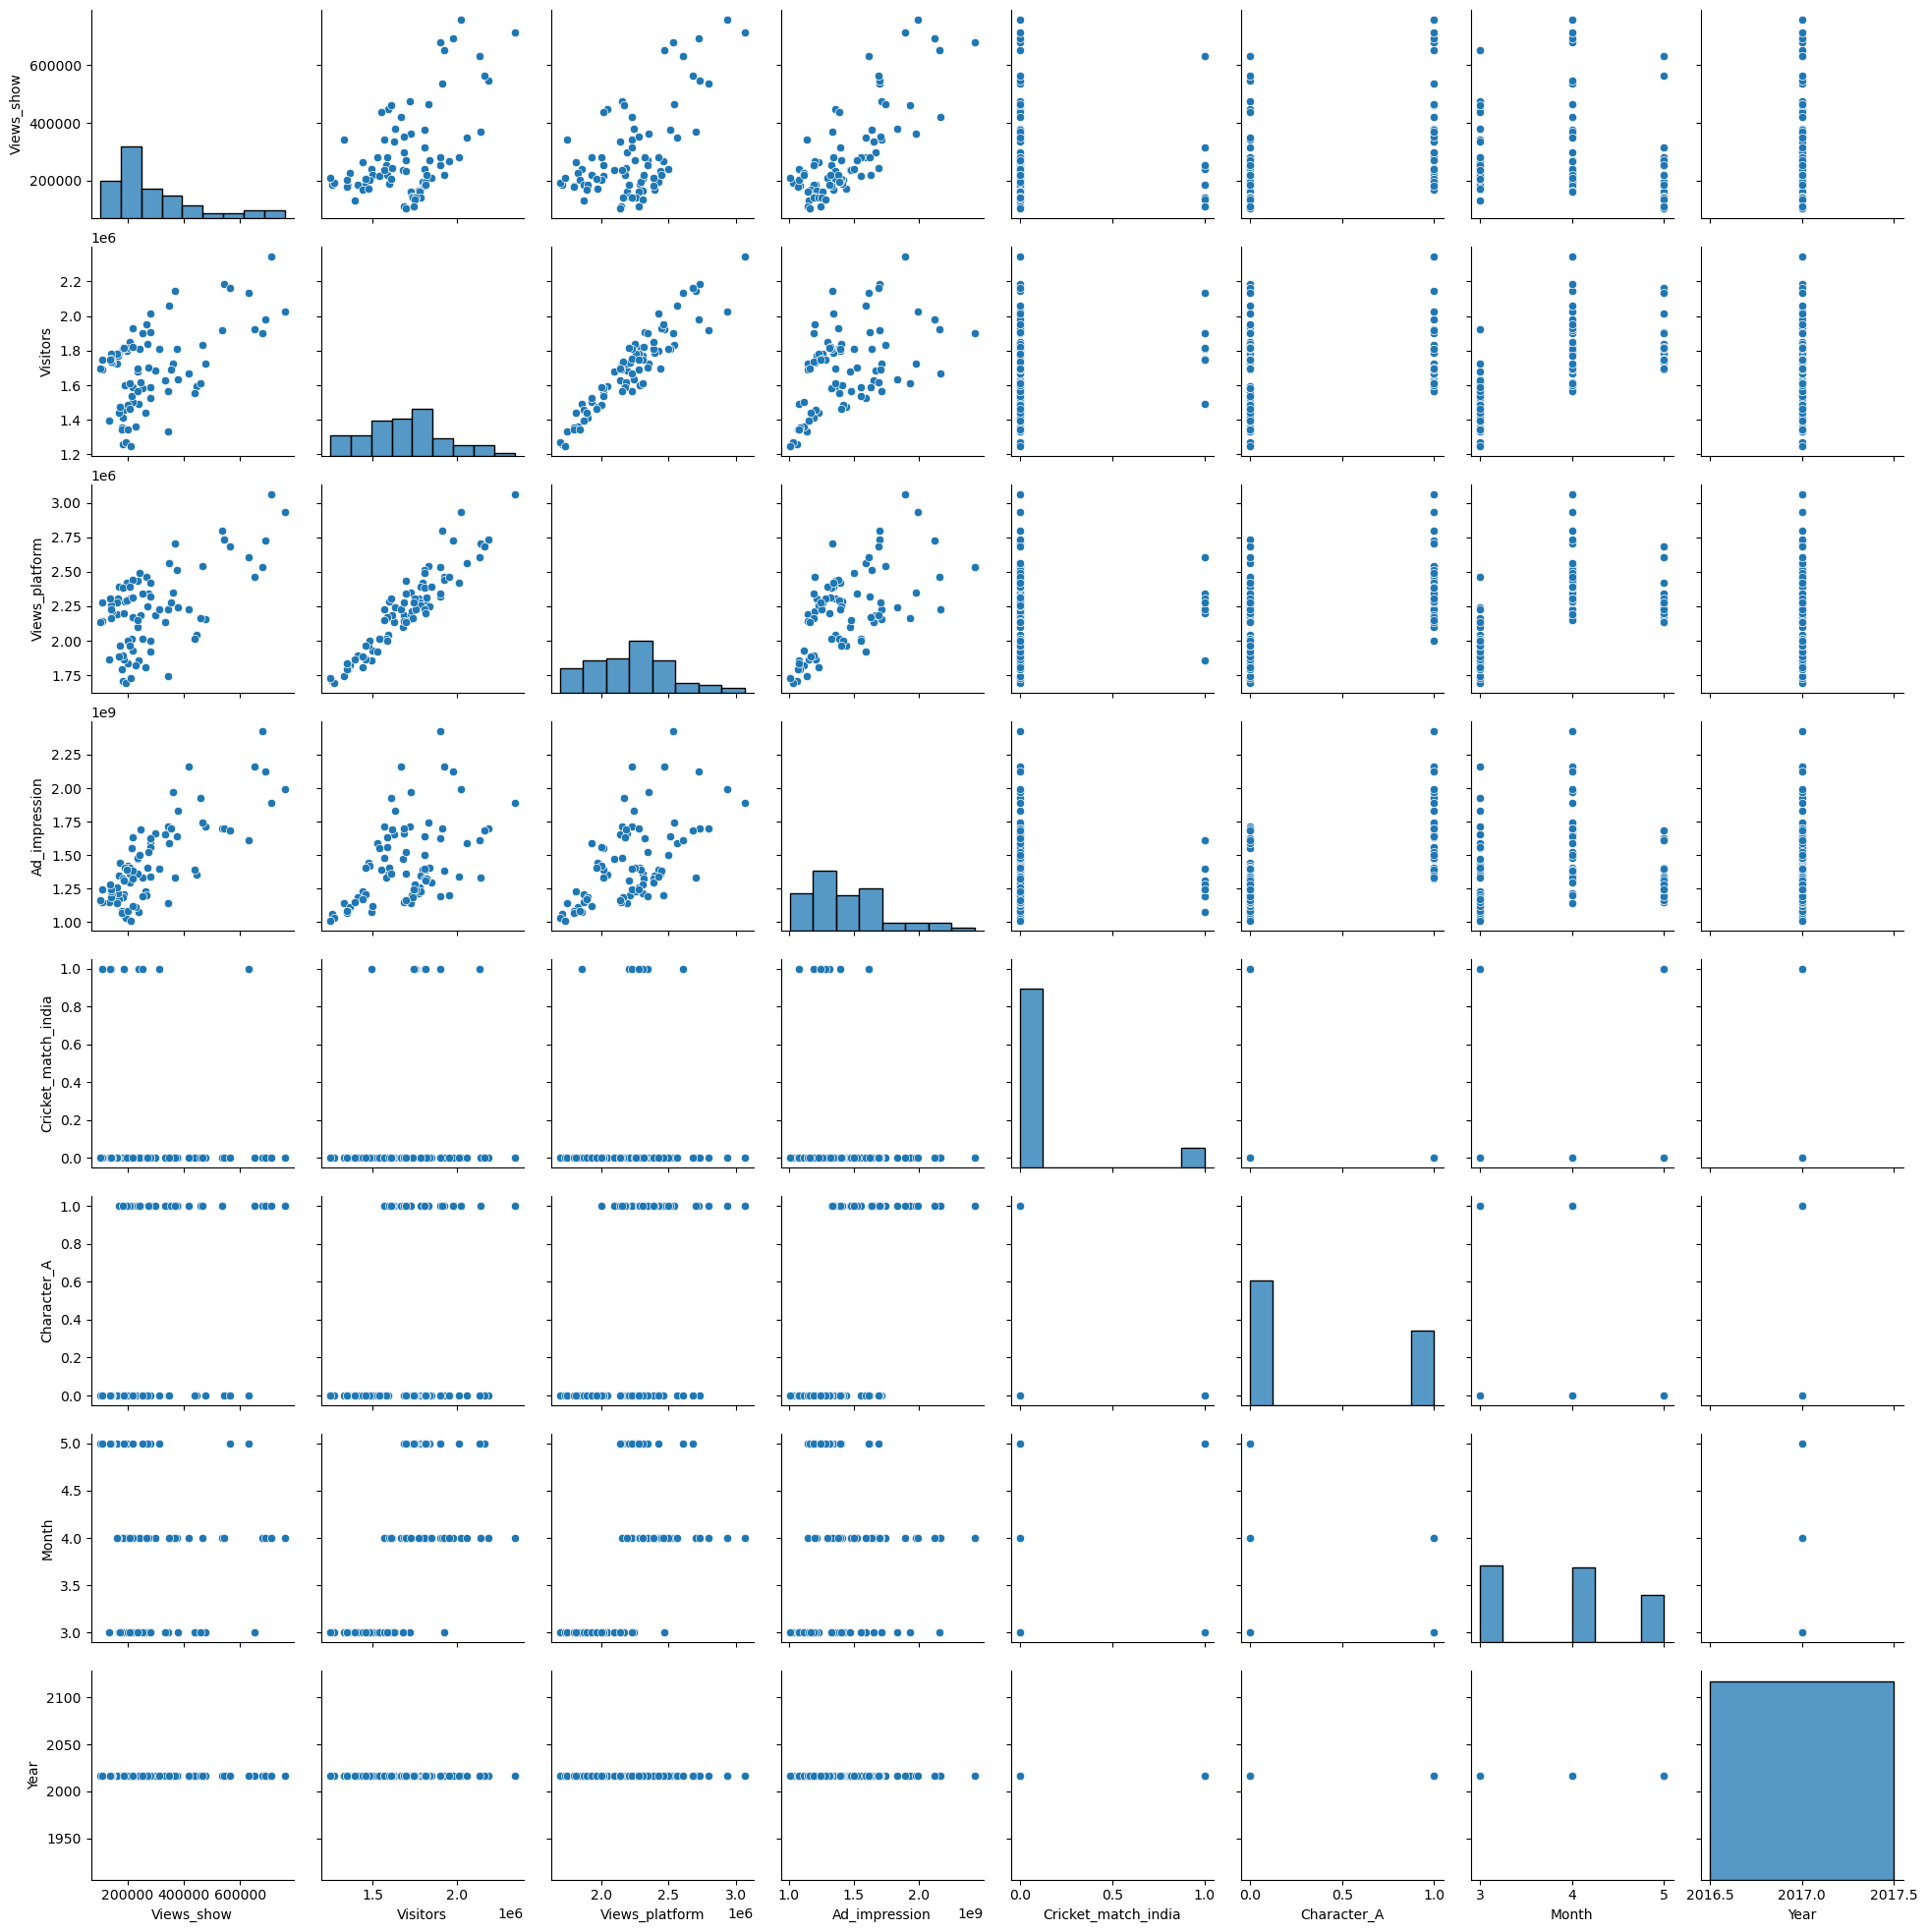

In [293]:
plt.figure(figsize=(15, 7))
sns.pairplot(media)
plt.show()

<Figure size 1500x700 with 0 Axes>

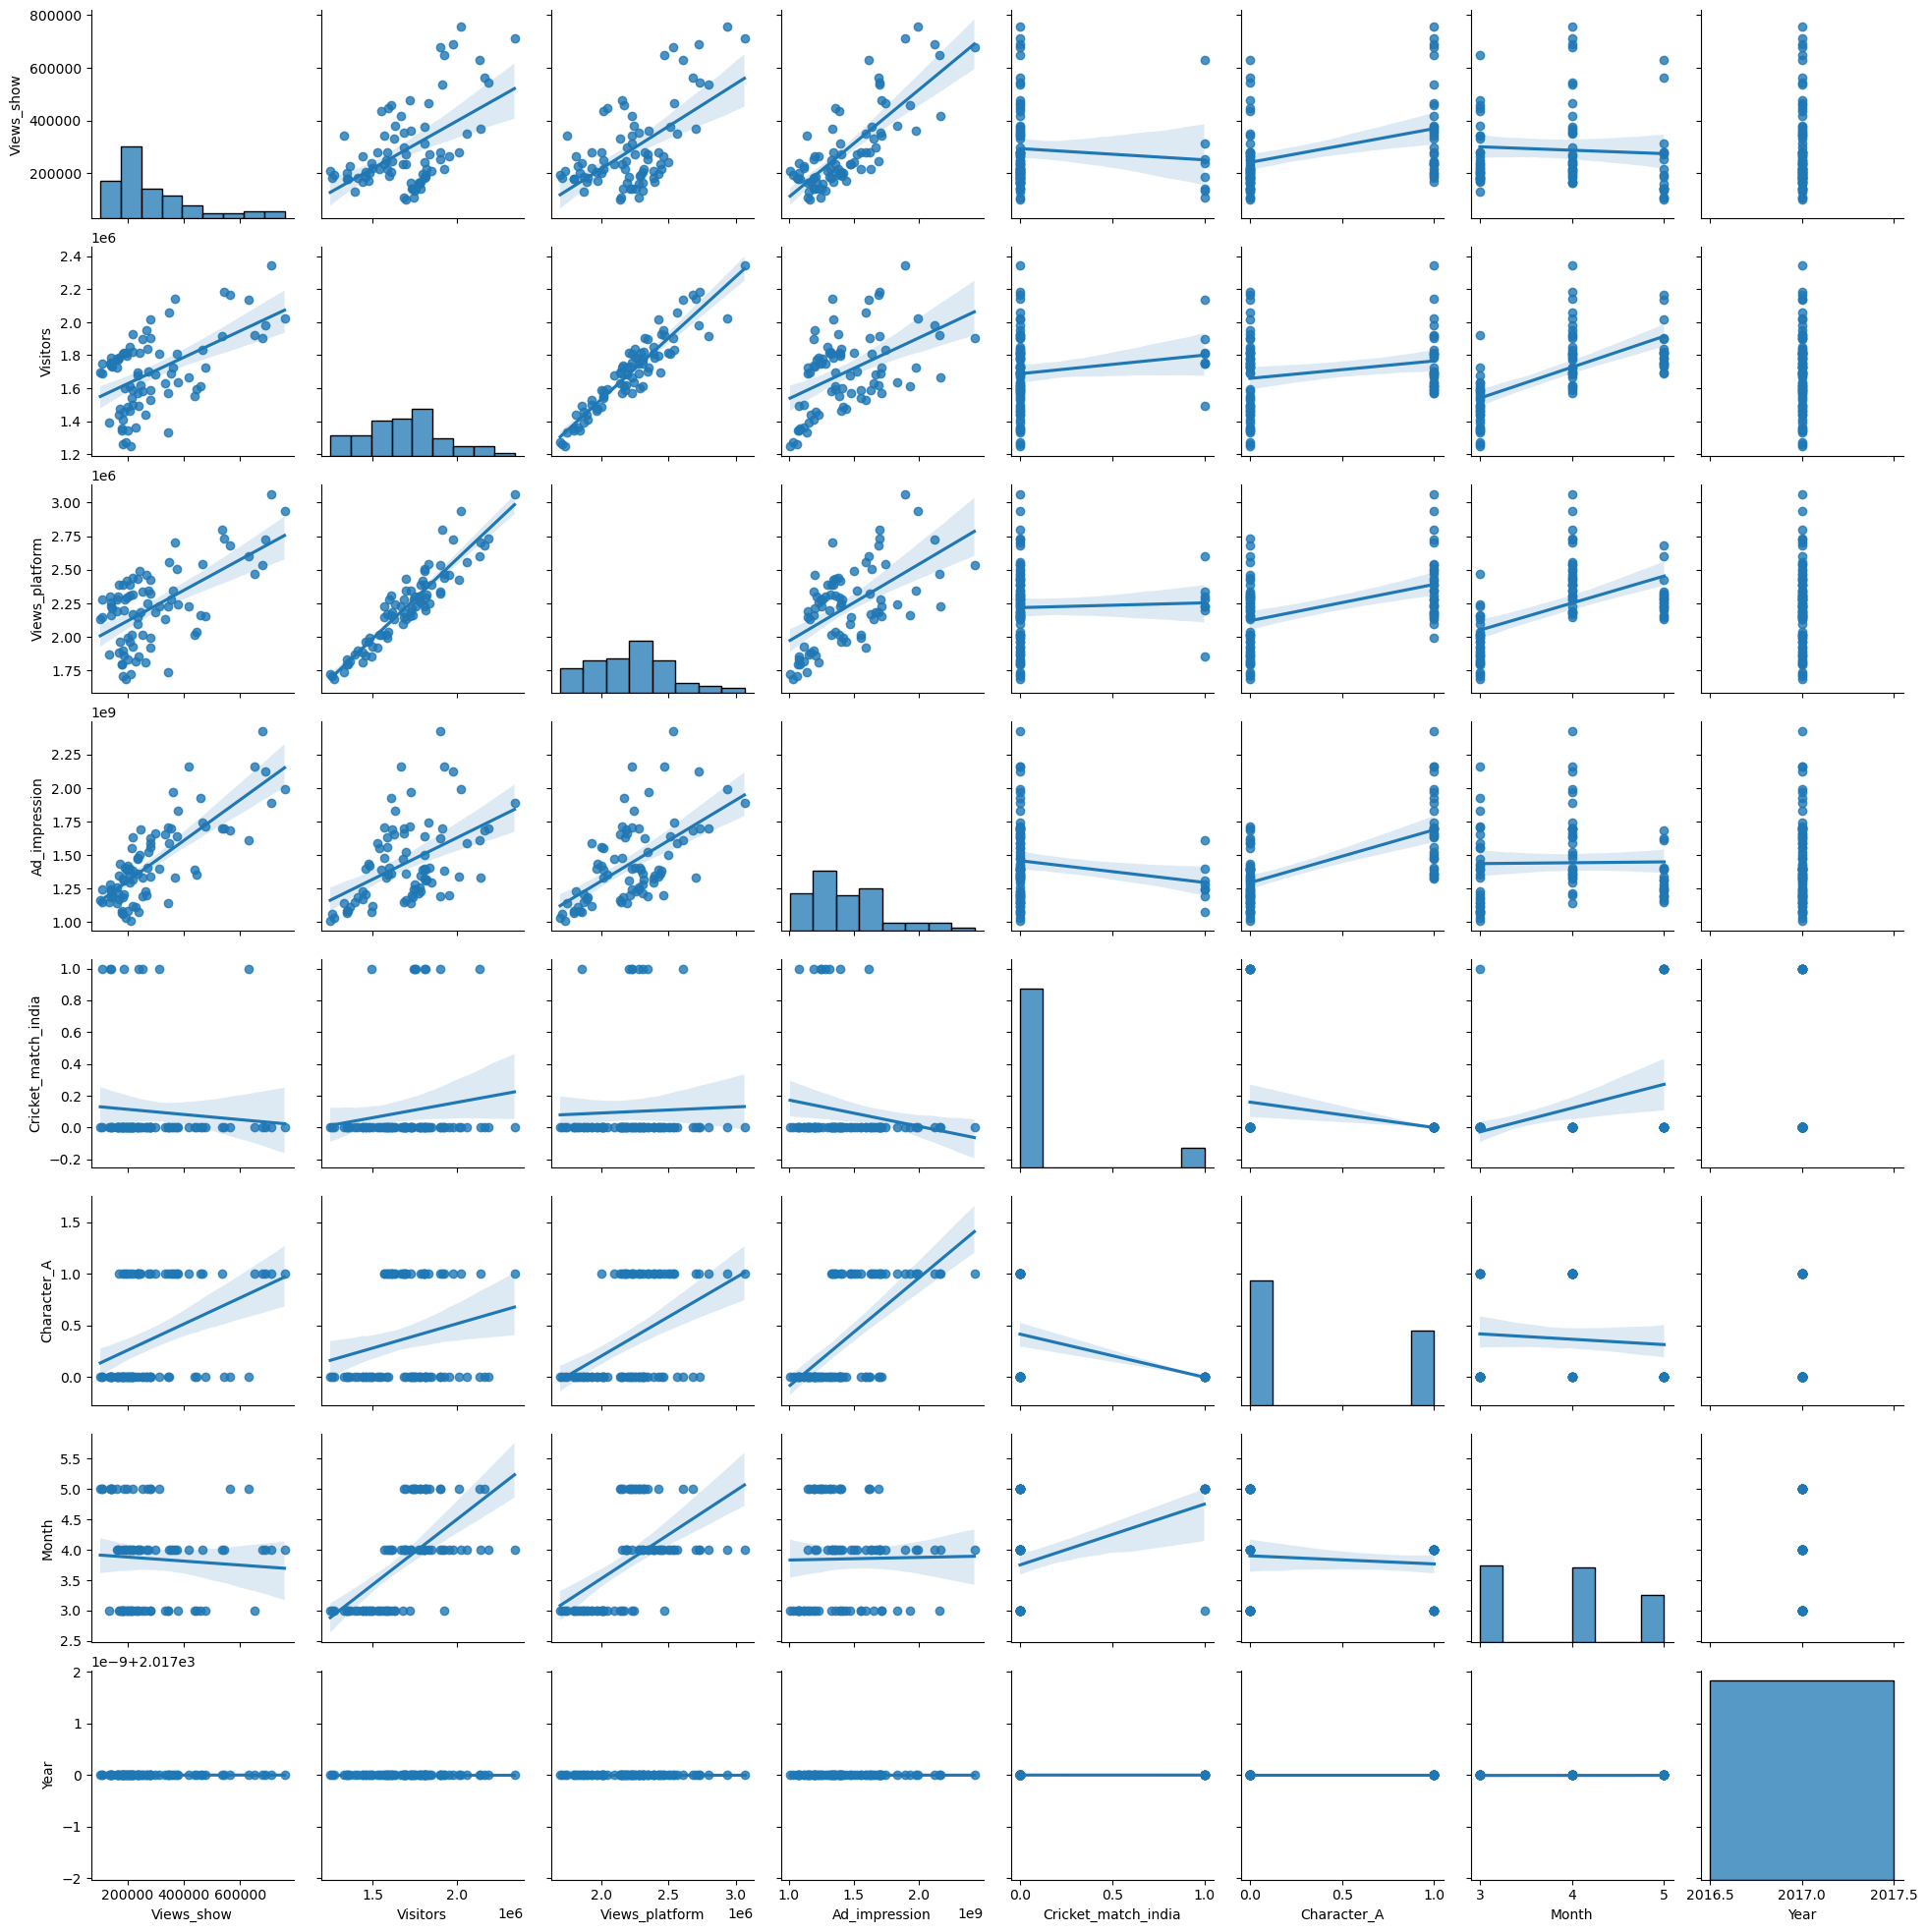

In [294]:
plt.figure(figsize=(15, 7))
sns.pairplot(media, kind='reg')
plt.show()

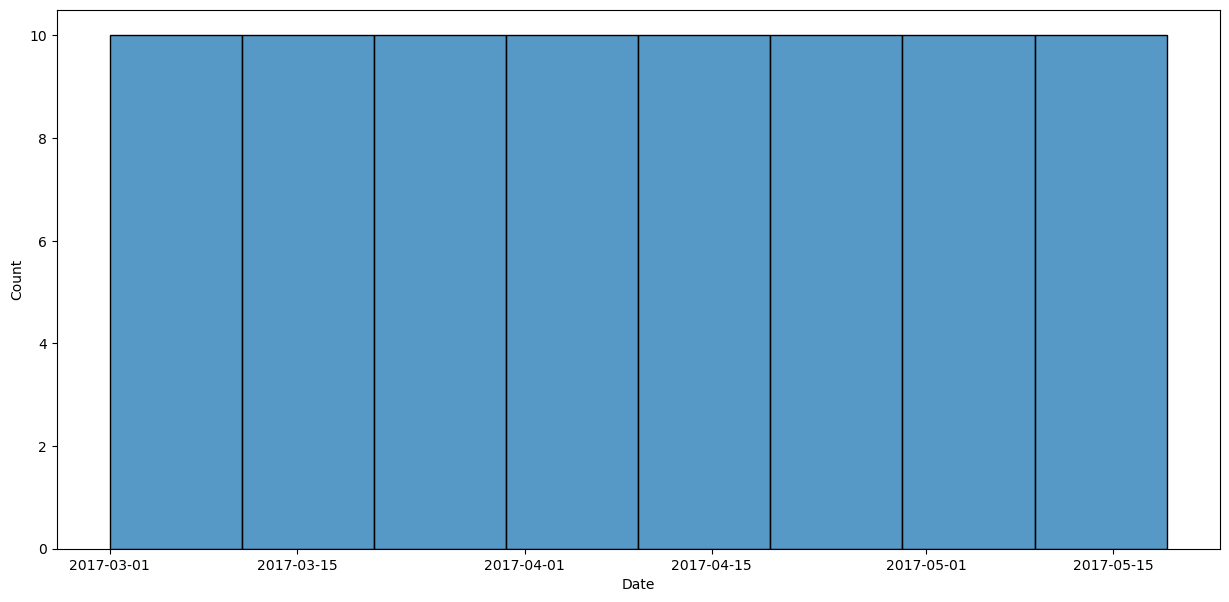

In [295]:
# analse individual feature
plt.figure(figsize=(15, 7))
sns.histplot(media['Date'])
plt.show()

In [297]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Month', 'Year'],
      dtype='object')

In [298]:
_bins=[num for num in np.arange(50000, 850000, 10000)]
# _bins

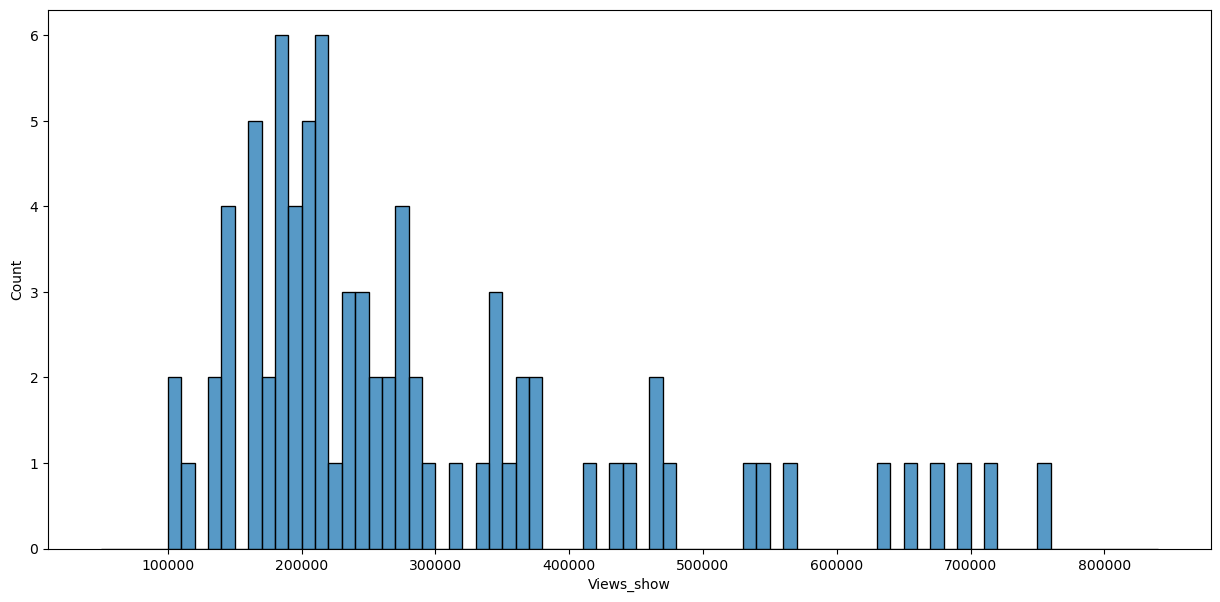

In [299]:
# analse individual feature
plt.figure(figsize=(15, 7))
sns.histplot(media['Views_show'], bins=_bins)
plt.show()

In [300]:
_bins=[num for num in np.arange(1000000, 3000000, 100000)]
# _bins

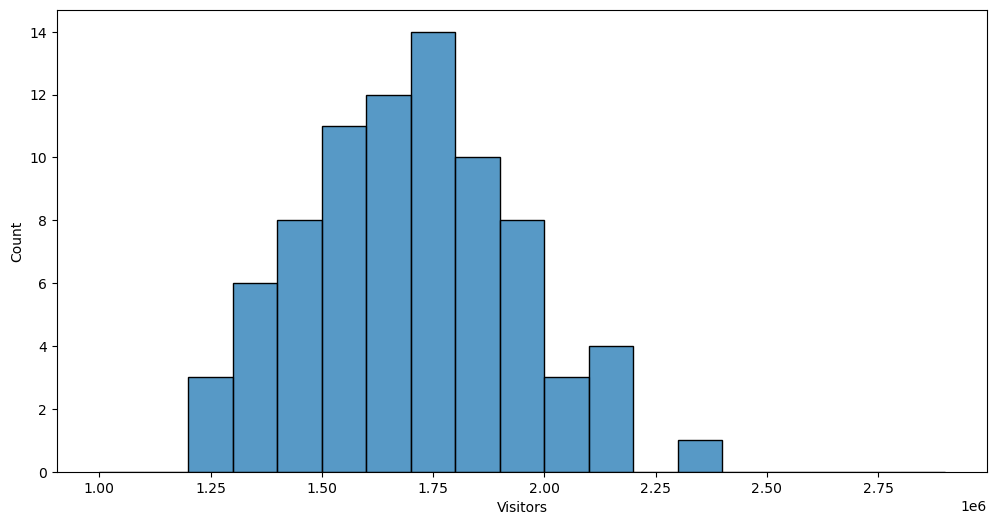

In [301]:
# analse individual feature
plt.figure(figsize=(12, 6))
sns.histplot(media['Visitors'], bins=_bins)
plt.show()

In [302]:
_bins=[num for num in np.arange(1500000, 4000000, 100000)]
# _bins

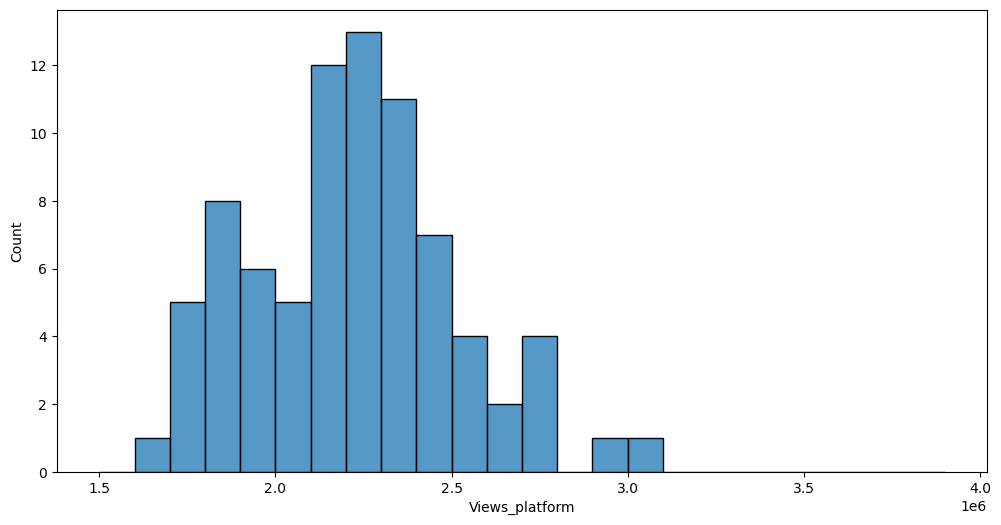

In [303]:
# analse individual feature
plt.figure(figsize=(12, 6))
sns.histplot(media['Views_platform'], bins=_bins)
plt.show()

In [304]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Month', 'Year'],
      dtype='object')

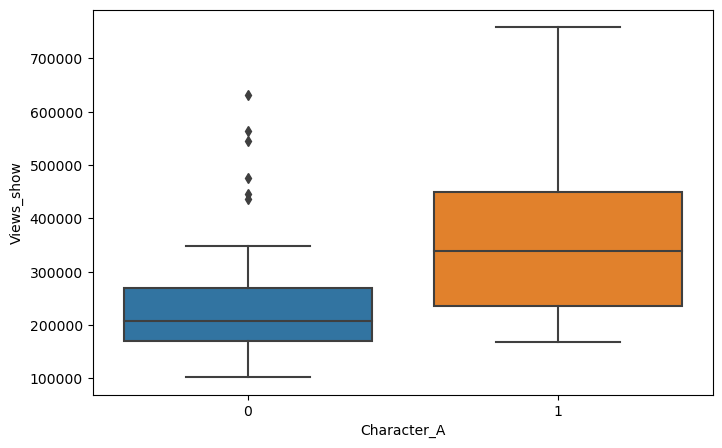

In [305]:
# analse individual feature
plt.figure(figsize=(8, 5))
sns.boxplot(y = 'Views_show', x='Character_A', data=media)
plt.show()

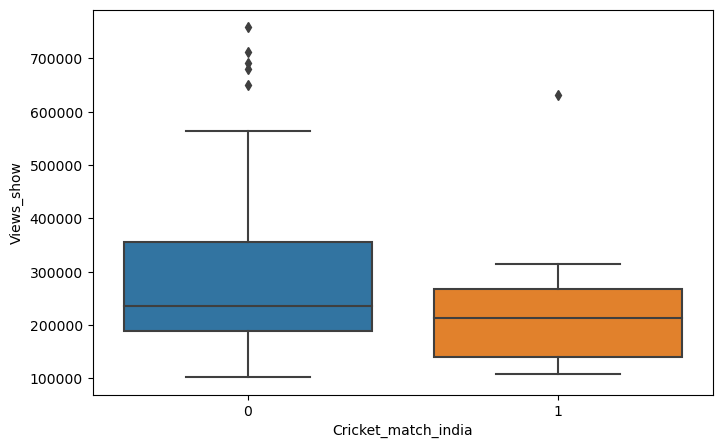

In [306]:
# analse individual feature
plt.figure(figsize=(8, 5))
sns.boxplot(y = 'Views_show', x='Cricket_match_india', data=media)
plt.show()

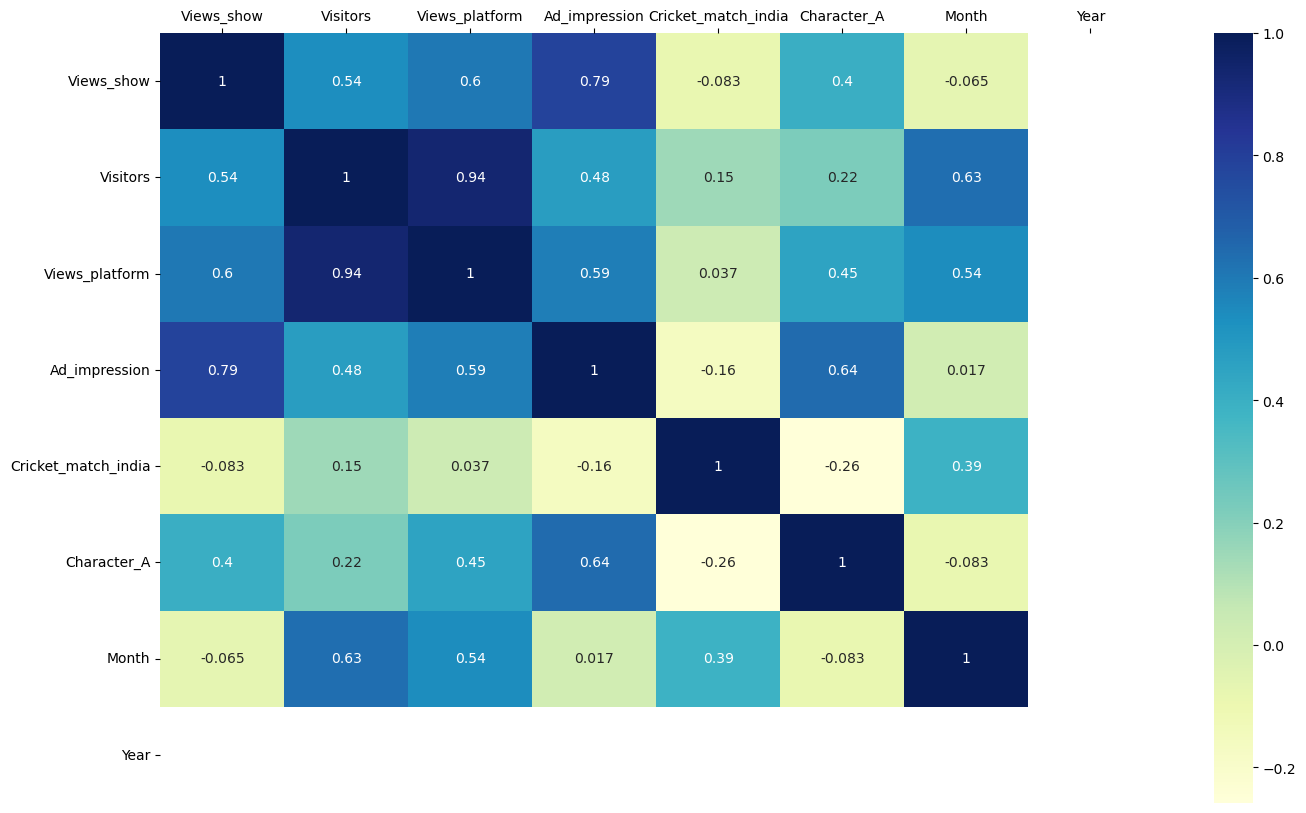

In [307]:
# analse individual feature
plt.figure(figsize=(16, 10))
ax = sns.heatmap(media.corr(), annot=True, cmap='YlGnBu')
ax.xaxis.tick_top()
plt.xticks(rotation=0)
plt.show()

In [308]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Month', 'Year'],
      dtype='object')

In [309]:
media.pivot_table(index=['Date'], values = ['Visitors'])

,Visitors
Date,
2017-03-01,1260228
2017-03-02,1270561
2017-03-03,1248183
2017-03-04,1492913
2017-03-05,1594712
...,...
2017-05-15,1808684
2017-05-16,1814227
2017-05-17,1755803


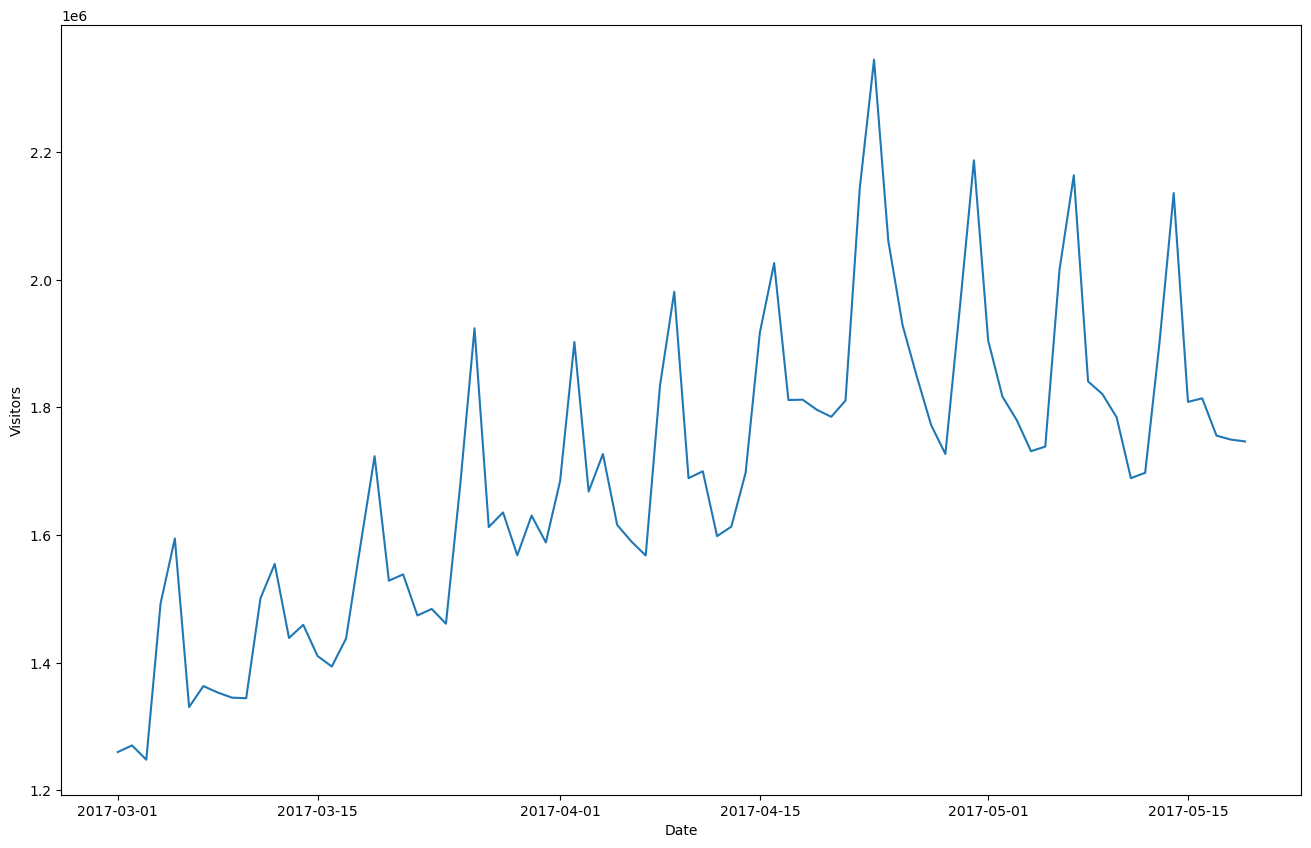

In [310]:
# time series plot
plt.figure(figsize=(16, 10))
sns.lineplot(x='Date', y='Visitors', data=media)
plt.show()

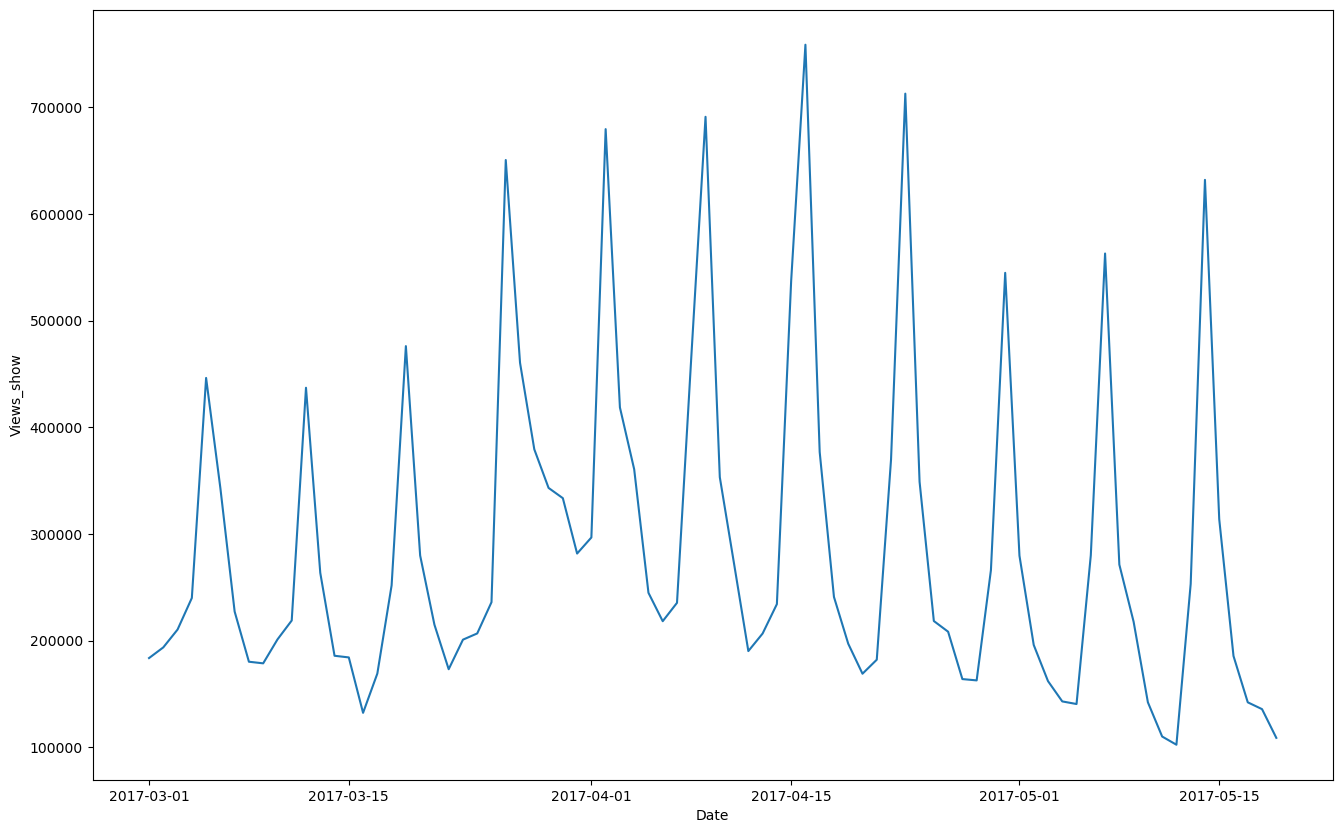

In [311]:
# time series plot
plt.figure(figsize=(16, 10))
sns.lineplot(x='Date', y='Views_show', data=media)
plt.xticks(rotation = 0)
plt.show()

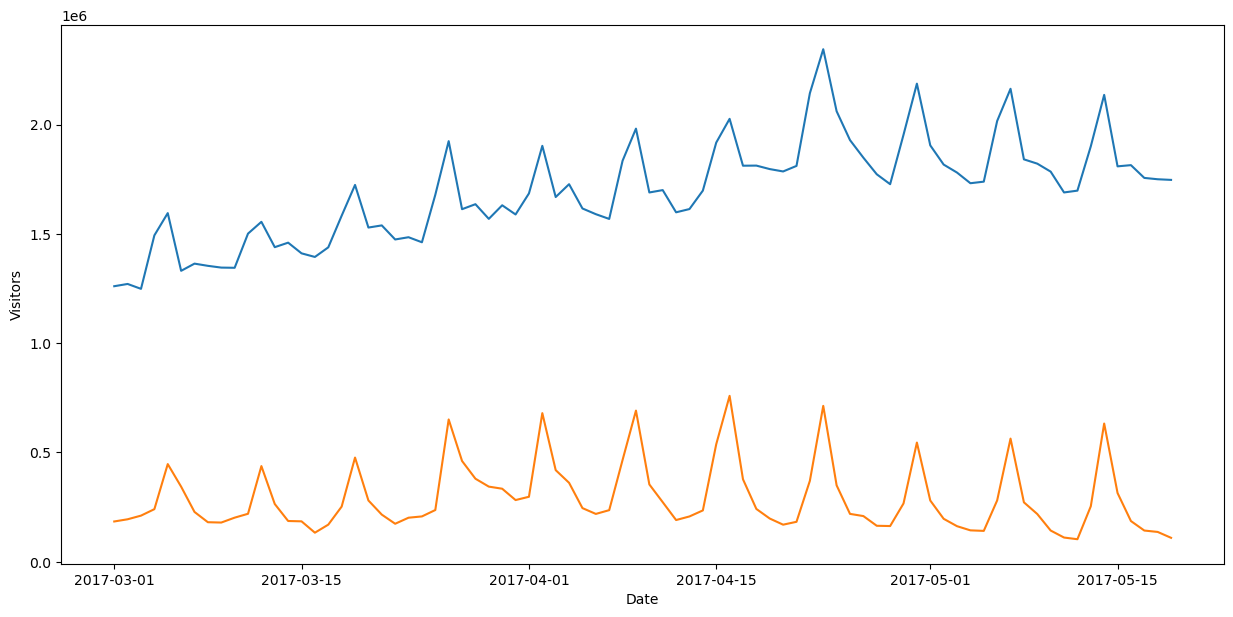

In [312]:
# time series plot
plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Visitors', data=media, legend=True)
sns.lineplot(x='Date', y='Views_show', data=media, legend=True)
plt.show()

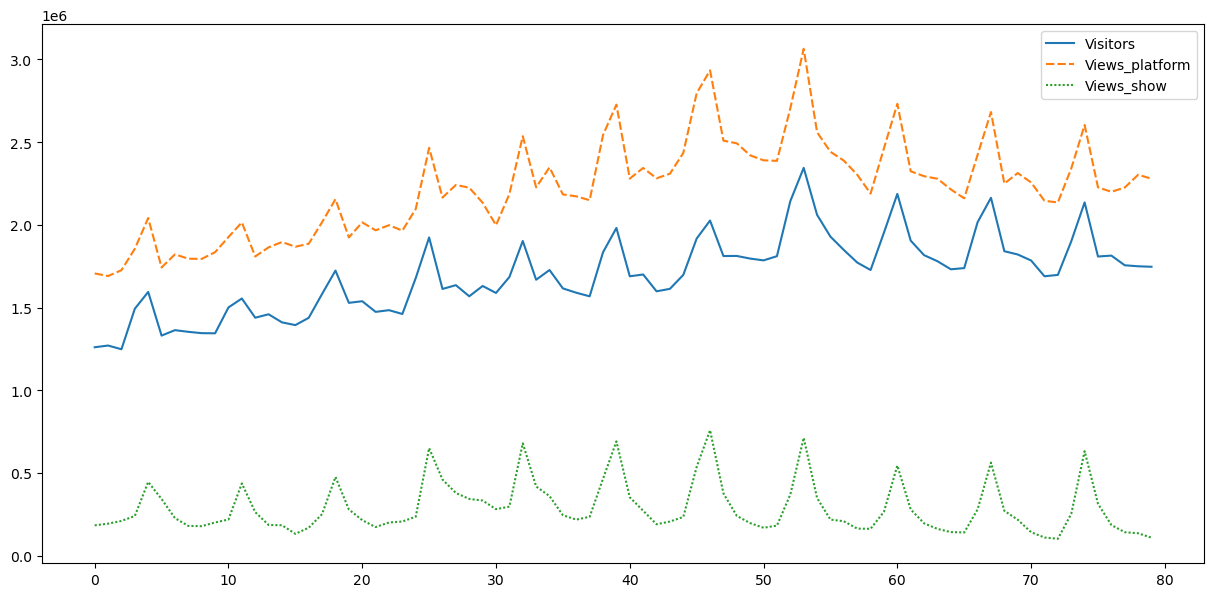

In [313]:
# time series plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=media[['Visitors', 'Views_platform', 'Views_show']])
plt.show()

In [ ]:
# time series plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=media[['Visitors', 'Views_platform', 'Views_show']], palette=['red', 'blue', 'purple'])
plt.show()

In [ ]:
x='year'
# time series plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=media[['Visitors', 'Views_platform', 'Views_show']])
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x= media['Date'], y= media['Visitors'], 
             data=pd.melt(media, ['Date']))
plt.show()

In [ ]:
media.columns

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(x= media['Date'], y= media['Visitors'],  palette=['red'])
sns.lineplot(x= media['Date'], y= media['Views_show'], palette=['blue'])
sns.lineplot(x= media['Date'], y= media['Views_platform'], palette=['purple'])
plt.show()

In [ ]:
sns.relplot(x=media['Date'] , y=media['Visitors', 'Views_platform'])
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=media, x="Date", y="Views_platform", hue="Character_A")
plt.show()

In [ ]:
md= media[['Date', 'Visitors', 'Views_platform']]
md.head(2)

In [ ]:
sns.lineplot(x=md['Date'], data=md)
plt.show()

In [ ]:
media.shape[1]

In [ ]:
media = media.iloc[:, : media.shape[1]-1]

In [ ]:
media.head()

In [ ]:
ax = sns.heatmap(media.corr(), annot=True, cmap='YlGnBu')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

In [ ]:
media.head()

In [ ]:
media['Date']

In [ ]:
from datetime import date
d0 = date(2017, 2, 28 )
print(type(d0))
print(media['Date'].dtype)
media['day']  = media['Date'] - (pd.to_datetime(d0))
media['day']

In [ ]:
media

In [ ]:
# days vs Views_show
plt.figure(figsize=(50, 5))
media.plot.box(x='day', y='Views_show')
plt.show()

In [ ]:
media.plot.line()

In [ ]:
#Build the model
from sklearn.model_selection import train_test_split

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=media, x="day", y="Views_platform")
plt.show()

In [ ]:
train_test_split

driving_features = []
target_variables = []

In [ ]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
subplot = fig.add_subplot(111)

par1 = subplot.twinx()
par2 = subplot.twinx()
par3 = subplot.twinx()

subplot.set_xlabel("Day")
subplot.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")
par3.set_ylabel("Visitors")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.25)
color3 = plt.cm.viridis(.5)
color4 = plt.cm.viridis(.75)

p1, = subplot.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")
p3, = par1.plot(media.day,media.Visitors,color=color3, label="Visitors")
p4, = par1.plot(media.day,media.Views_platform,color=color4, label="Views_platform")

lns = [p1, p2, p3, p4]
subplot.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

subplot.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.show()
# plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [ ]:
media.head()

In [ ]:
is_string_part_removed_from_day_colmn = False

In [268]:
print(is_string_part_removed_from_day_colmn)

False


In [270]:
media['day']

0      1
1      2
2      3
3      4
4      5
      ..
75    76
76    77
77    78
78    79
79    80
Name: day, Length: 80, dtype: int32

In [271]:
# Cleaning days

if not is_string_part_removed_from_day_colmn:
    media['day'] = media['day'].astype(str)
    media['day'] = media['day'].map(lambda x: x[:-4])
    media['day'] = media['day'].astype(int)
    is_string_part_removed_from_day_colmn = True

ValueError: invalid literal for int() with base 10: ''

In [272]:
print(is_string_part_removed_from_day_colmn)

False


In [276]:
media['day'].dtype

dtype('O')

In [262]:
from sklearn.linear_model import LinearRegression

In [ ]:
driving_features = ['Visitors' ,'']

In [395]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Month,Year
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,3,2017
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,2017
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,2017
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,3,2017
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,3,2017


In [405]:
from sklearn.preprocessing  import MinMaxScaler

In [411]:
media2 = media
num_vars = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']

scaler = MinMaxScaler()

if(scaler):
    media2[num_vars] = scaler.fit_transform(media2[num_vars])
    
media2[num_vars].head()

,Views_show,Visitors,Views_platform,Ad_impression
0,0.123787,0.010985,0.011466,0.035372
1,0.139066,0.020409,0.000000,0.014844
2,0.164544,0.000000,0.025792,0.000000
3,0.209631,0.223199,0.119842,0.048345
4,0.523988,0.316041,0.255290,0.245426


In [412]:
    
media2.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Month,Year
0,2017-03-01,0.123787,0.010985,0.011466,0.035372,0,0,3,2017
1,2017-03-02,0.139066,0.020409,0.000000,0.014844,0,0,3,2017
2,2017-03-03,0.164544,0.000000,0.025792,0.000000,0,0,3,2017
3,2017-03-04,0.209631,0.223199,0.119842,0.048345,1,0,3,2017
4,2017-03-05,0.523988,0.316041,0.255290,0.245426,0,0,3,2017


In [414]:
# Melt the dataframe to reshape it for line plot
media2_melted = media2.melt(id_vars='Date', var_name='Features', value_name='Value')

In [415]:
media2_melted

,Date,Features,Value
0,2017-03-01,Views_show,0.123787
1,2017-03-02,Views_show,0.139066
2,2017-03-03,Views_show,0.164544
3,2017-03-04,Views_show,0.209631
4,2017-03-05,Views_show,0.523988
...,...,...,...
635,2017-05-15,Year,2017.000000
636,2017-05-16,Year,2017.000000
637,2017-05-17,Year,2017.000000
638,2017-05-18,Year,2017.000000


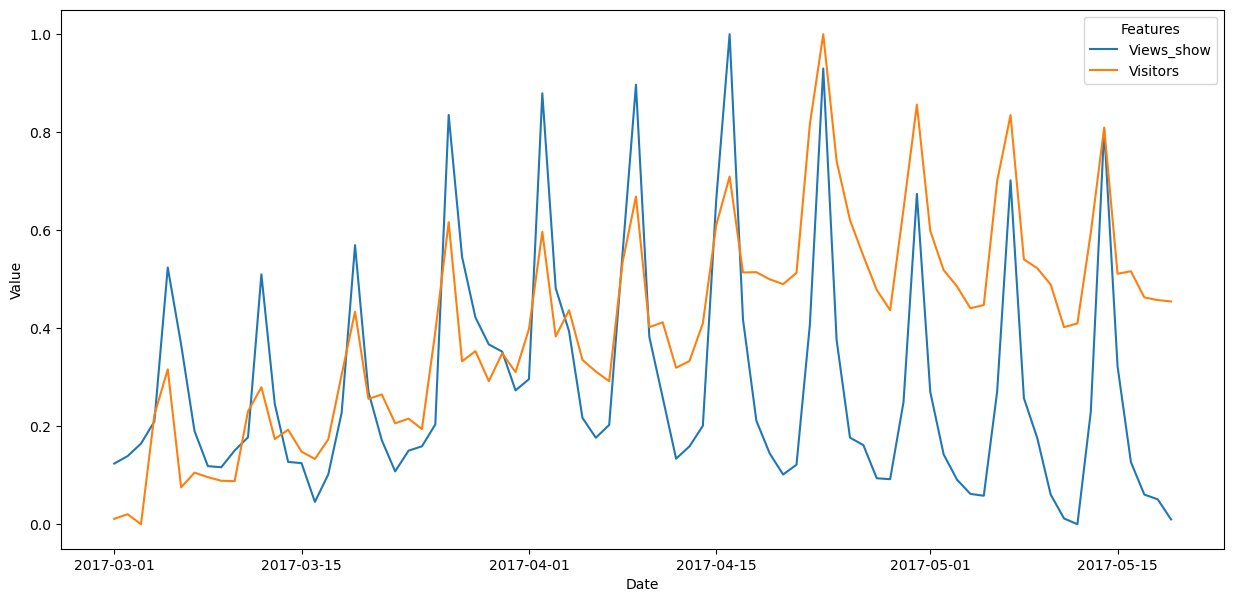

In [422]:
plt.figure(figsize=(15, 7))
# Plot the line plot
sns.lineplot(x='Date', y='Value', hue='Features', data=media2_melted.iloc[:160, :])

# Set the x-axis labels as dates
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [391]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataset
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
        'peature1': [10, 15, 12, 17],
        'peature2': [8, 11, 9, 14],
        'peature3': [6, 9, 7, 12]}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Melt the dataframe to reshape it for line plot
df_melted = df.melt(id_vars='Date', var_name='Feature', value_name='Value')

df_melted.head(10)

,Date,Feature,Value
0,2023-01-01,peature1,10
1,2023-01-02,peature1,15
2,2023-01-03,peature1,12
3,2023-01-04,peature1,17
4,2023-01-01,peature2,8
5,2023-01-02,peature2,11
6,2023-01-03,peature2,9
7,2023-01-04,peature2,14
8,2023-01-01,peature3,6
9,2023-01-02,peature3,9


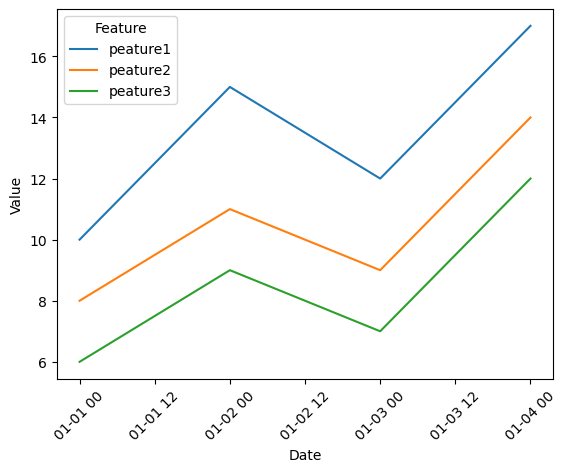

In [390]:

# Plot the line plot
sns.lineplot(x='Date', y='Value', hue='Feature', data=df_melted)

# Set the x-axis labels as dates
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [424]:
pip install openai

Note: you may need to restart the kernel to use updated packages.Collecting openai
     -------------------------------------- 72.0/72.0 kB 656.9 kB/s eta 0:00:00
     ------------------------------------ 323.6/323.6 kB 426.4 kB/s eta 0:00:00
     ---------------------------------------- 61.7/61.7 kB 1.1 MB/s eta 0:00:00



In [ ]:
media.head()